# Linear Regression - Bike Sharing Assignment

## Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

## Business Goal
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market

## What we need to do?
This assignment is a programming assignment wherein you have to build a multiple linear regression model for the prediction of demand for shared bikes. You will need to submit a Jupyter notebook for the same. 

### Data Preparation
1. You can observe in the dataset that some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary). These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case (Check the data dictionary and think why). So, it is advisable to convert such feature values into categorical string values before proceeding with model building. Please refer the data dictionary to get a better understanding of all the independent variables.
 
2. You might notice the column 'yr' with two values 0 and 1 indicating the years 2018 and 2019 respectively. At the first instinct, you might think it is a good idea to drop this column as it only has two values so it might not be a value-add to the model. But in reality, since these bike-sharing systems are slowly gaining popularity, the demand for these bikes is increasing every year proving that the column 'yr' might be a good variable for prediction. So think twice before dropping it. 


### Model Building
In the dataset provided, you will notice that there are three columns named 'casual', 'registered', and 'cnt'. The variable 'casual' indicates the number casual users who have made a rental. The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day. Finally, the 'cnt' variable indicates the total number of bike rentals, including both casual and registered. <b> The model should be built taking this 'cnt' as the target variable.</b>

## STEP 1 : Reading and Understanding Data

In [8]:
#Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import scipy.stats as stats


In [9]:
bike_df = pd.read_csv(r"C:\Users\Niraj\Downloads\day (1).csv")

In [10]:
bike_df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [11]:
#Checking Information of the dataset
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [12]:
#Checking Statistics Information of the dataset
bike_df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [13]:
#Check the Shape of the dataset
bike_df.shape

(730, 16)

### Inferences on the first look of Data
- Dataset has 730 rows and 16 columns
- Except one column "dteday" which is Date datatype rest all are either integer or float
- As given in the problem statement, some categorical variables also have integer datatype which needs to be looked into in the coming steps
- There are no duplicates in the dataset

## STEP 2 : Data Quality Checks and Data Cleaning

In [16]:
# Check whether there are any duplicates in the dataset
bike_df.duplicated().any()

False

In [17]:
# Check if there are any empty/ null values in any of the columns
bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [18]:
# Check if there are any empty/ null values in any of the rows. Summing it up as if any of the rows have empty values then value will be greater than 0
bike_df.isnull().sum(axis=1).sum()

0

### Inferences from Data quality Checks
- No Duplicates in the dataset
- No empty / null values in any of the columns
- No empty / null values in any of the rows

In [20]:
bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [21]:
bike_df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [22]:
#Looks like instant column is just a unique number for the entire dataset
bike_df.instant.value_counts()

instant
1      1
480    1
482    1
483    1
484    1
      ..
246    1
247    1
248    1
249    1
730    1
Name: count, Length: 730, dtype: int64

In [23]:
# dteday is showing Month and year, but first day of the month for all rows. 
# We should if there is any corelation between dteday , yr and mnth where yr =0 represents 2018 and 1 represents 2019 as per Data dict

In [24]:
bike_df[["dteday","yr","mnth"]].value_counts()

dteday      yr  mnth
01-01-2018  0   1       1
20-12-2019  1   12      1
21-01-2019  1   1       1
21-02-2018  0   2       1
21-02-2019  1   2       1
                       ..
11-03-2019  1   3       1
11-04-2018  0   4       1
11-04-2019  1   4       1
11-05-2018  0   5       1
31-12-2019  1   12      1
Name: count, Length: 730, dtype: int64

In [25]:
# Year and Month from dtedata is already captured, only days column will be there which is also covered in a way through weekday, working day. 
# Hence we can delete this column

In [26]:
#Looks like cnt varaible is sum of casual and registered values. 
# As cnt is the target variable for us which is sum of casual and registered, let us delete them

In [27]:
bike = bike_df.drop(["instant","dteday","casual","registered"], axis =1)

In [28]:
bike.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [29]:
#Let us look at Categorical columns now
# Season, mnth, weekday, weathersit

In [30]:
bike.season.value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [31]:
bike.mnth.value_counts()

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64

In [32]:
bike.weekday.value_counts()

weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64

In [33]:
bike.weathersit.value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [34]:
# As per Data Dict
bike.season = bike.season.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
bike.mnth = bike.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike.weekday = bike.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
bike.weathersit = bike.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})
#bike.yr = bike.yr.map({1:'2019',0:'2018'})

In [35]:
bike.head()

season  yr mnth  holiday weekday  workingday weathersit       temp  \
0  Spring   0  Jan        0     Sat           0      Misty  14.110847   
1  Spring   0  Jan        0     Sun           0      Misty  14.902598   
2  Spring   0  Jan        0     Mon           1      Clear   8.050924   
3  Spring   0  Jan        0     Tue           1      Clear   8.200000   
4  Spring   0  Jan        0     Wed           1      Clear   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

## Step 3 : Data Visualisation

##### Let us do some Univariate, Bivariate Analysis

In [38]:
def plot_univarients(df, col):
    numerical_cols = {"temp":"Temperature","atemp":"Temperature-Feel","hum":"Humidity","windspeed":"Windspeed","cnt":"Count of Bikes"}
    fig,p = plt.subplots(1,2,figsize = (16,4))
    sns.histplot(df.loc[df[col].notnull(), col], kde=True, ax=p[0]) 
    #sns.histplot(df.loc[df[col].notnull(), col] , kde = True, hist=True, ax=p[0])
    sns.boxplot(x=col, data = df, ax= p[1])
    p[0].set_xlabel(numerical_cols[col])
    p[1].set_xlabel(numerical_cols[col])
    plt.tight_layout()
    plt.show()

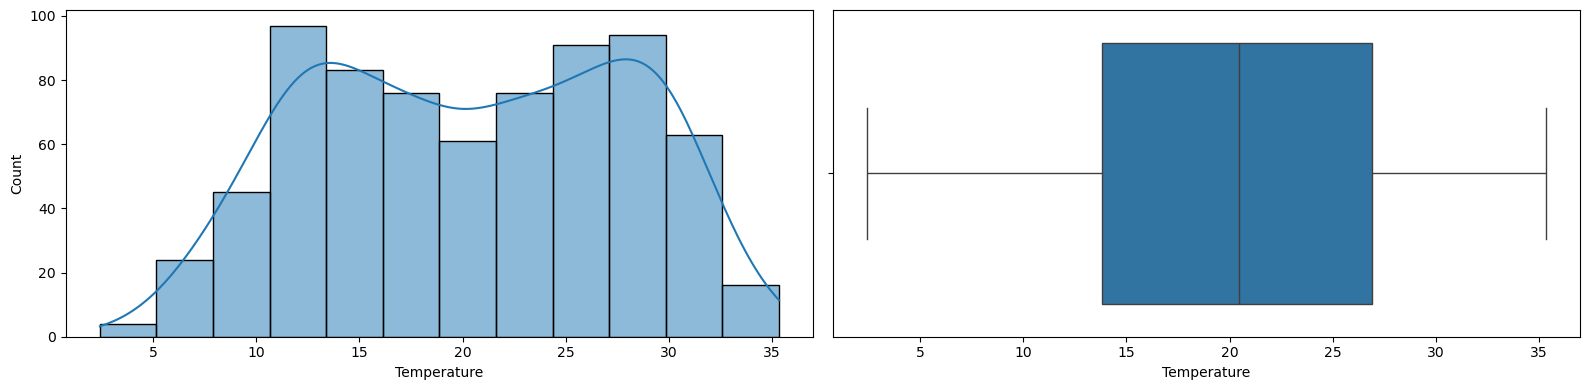

In [39]:
plot_univarients(bike,'temp')

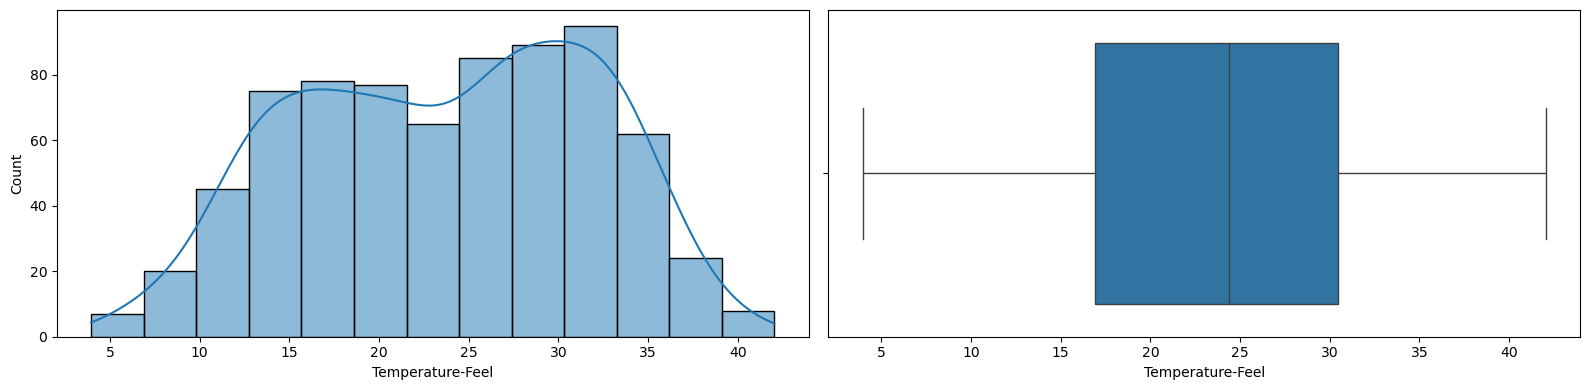

In [40]:
plot_univarients(bike,'atemp')

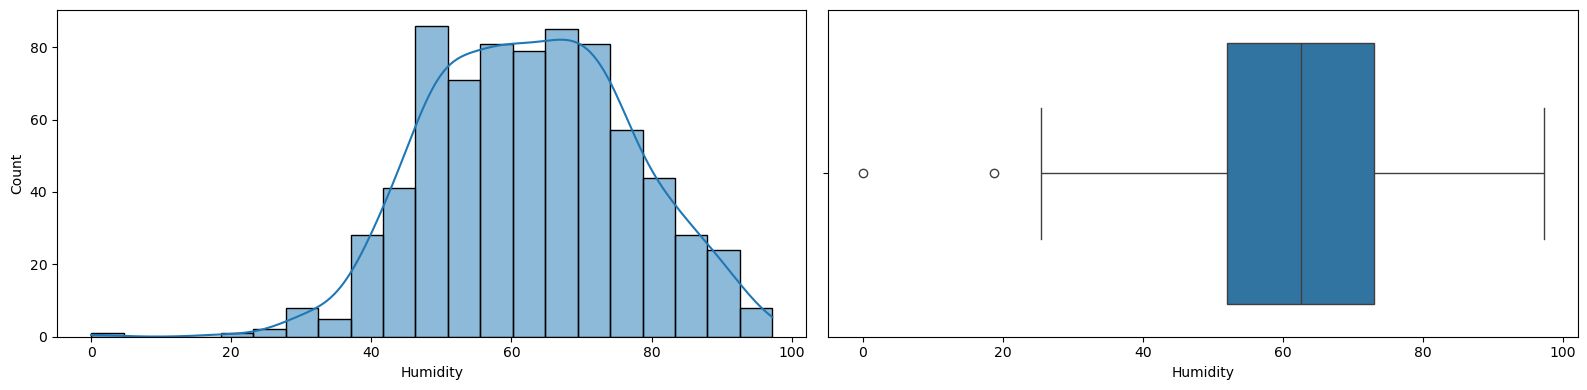

In [41]:
plot_univarients(bike,'hum')

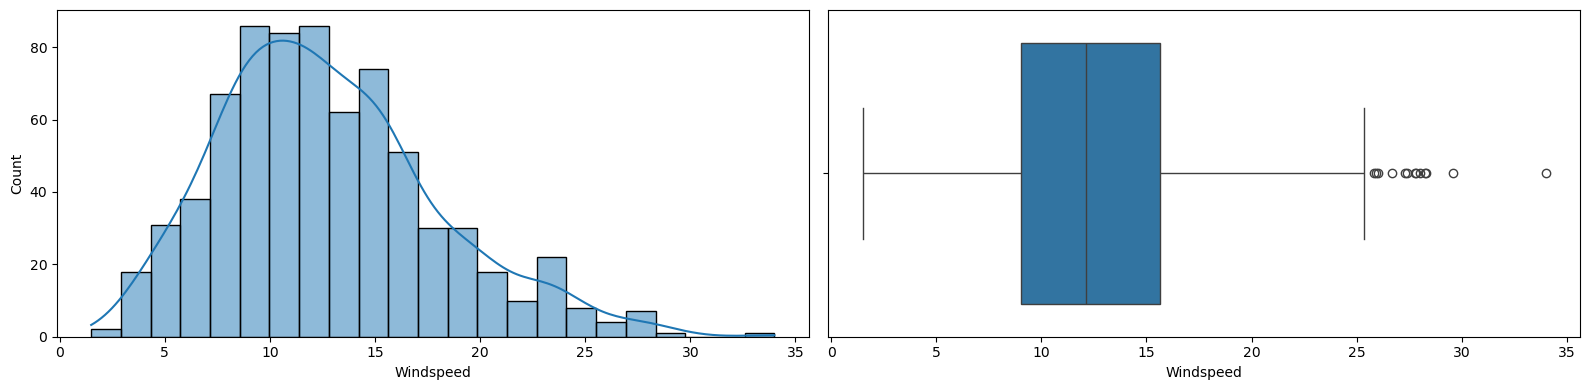

In [42]:
plot_univarients(bike,'windspeed')

#####
- Not much inferences to be called out from univariate analysis on continuos variables
- temp and atemp varaible almost mimicks each other

In [44]:
categorical_cols = ["season","yr","mnth","holiday","weekday","workingday","weathersit"]

<Axes: xlabel='season'>

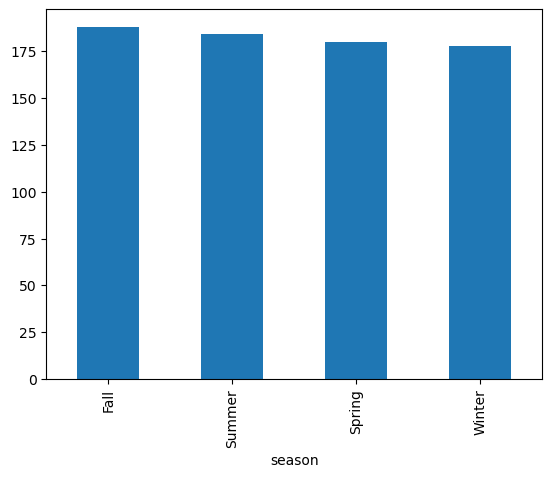

In [45]:
bike['season'].value_counts().plot.bar()

<Axes: xlabel='yr'>

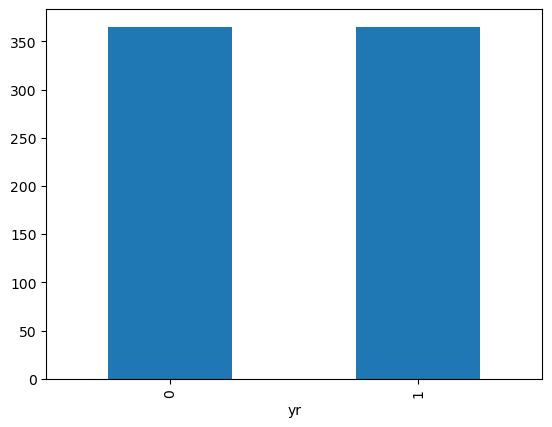

In [46]:
bike['yr'].value_counts().plot.bar()

<Axes: xlabel='mnth'>

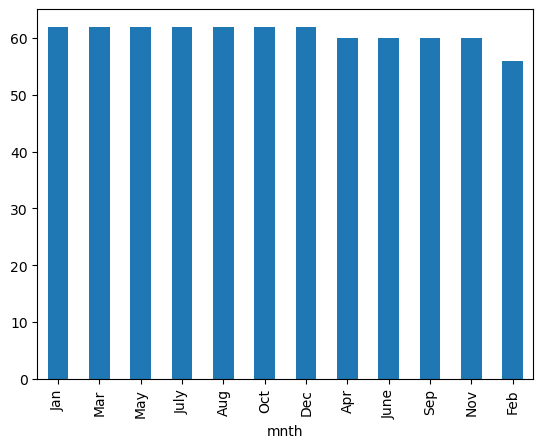

In [47]:
bike['mnth'].value_counts().plot.bar()

<Axes: xlabel='holiday'>

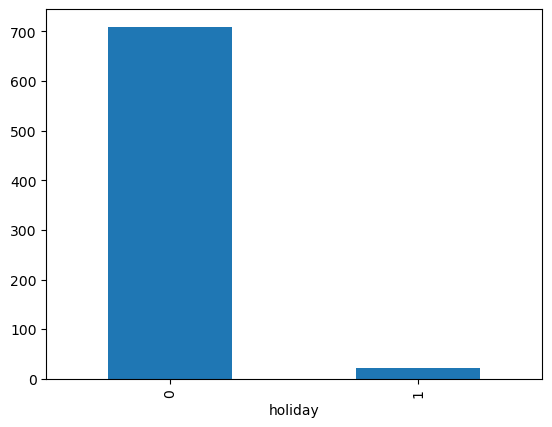

In [48]:
bike['holiday'].value_counts().plot.bar()

<Axes: xlabel='weekday'>

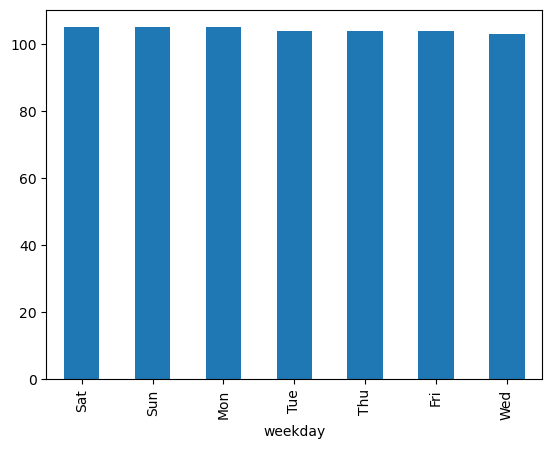

In [49]:
bike['weekday'].value_counts().plot.bar()

<Axes: xlabel='workingday'>

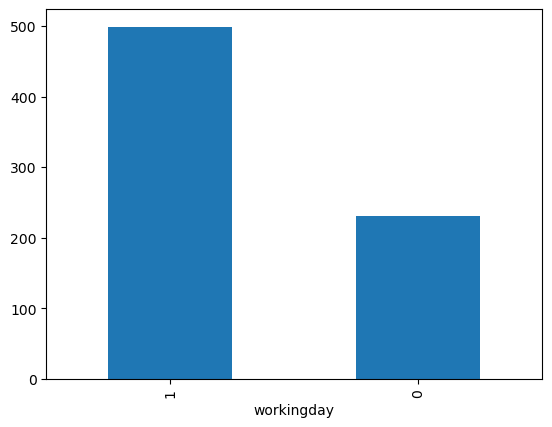

In [50]:
bike['workingday'].value_counts().plot.bar()

<Axes: xlabel='weathersit'>

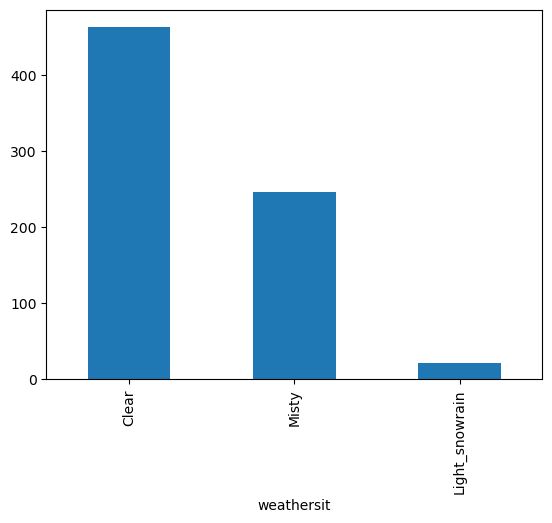

In [51]:
bike['weathersit'].value_counts().plot.bar()

##### Bivariate Analysis

In [53]:
def plot_bar_graph_against_cnt(col_name, col_desc):

    fig = px.bar(data_frame=bike, x= col_name, y="cnt", title=f"{col_desc} vs Count", 
                 labels={col_name:col_desc, "cnt":"Count"},
                color=col_name, template="plotly")
    #fig.update_layout( autosize=False, width=600, height=300 )
    fig.show()

In [54]:
categorical_cols = ["season","yr","mnth","holiday","weekday","workingday","weathersit"]

In [55]:
plot_bar_graph_against_cnt("season", "Season")

In [56]:
#Count of Bikes is more during Fall and Summer than Winter and Spring

In [57]:
plot_bar_graph_against_cnt("yr", "Year")

In [58]:
#There are more rental bike requests in 2019 than 2018

In [59]:
plot_bar_graph_against_cnt("mnth", "Month")

In [60]:
#Bike Rentals are more from May to September and is lowest in Jan, Feb and Dec

In [61]:
plot_bar_graph_against_cnt("holiday", "Holiday")

In [62]:
plot_bar_graph_against_cnt("weekday", "Weekday")

In [63]:
# Weekdays have not much impact on the bike rental count

In [64]:
plot_bar_graph_against_cnt("workingday", "Working Day")

In [65]:
#Bike Rentals are more during Workingday then a non working day

In [66]:
plot_bar_graph_against_cnt("weathersit", "Weather Sit")

In [67]:
# Weather is clear on most number of days and few days encounters Light Snow rain

In [68]:
fig = px.bar(data_frame=bike, x= "mnth", y="season", title=f"Month vs Season", 
                 labels={"mnth":"Month", "season":"Season"},
                color="mnth", template="plotly")
    #fig.update_layout( autosize=False, width=600, height=300 )
fig.show()

In [69]:
# There is very strong corelation between Month and Season 

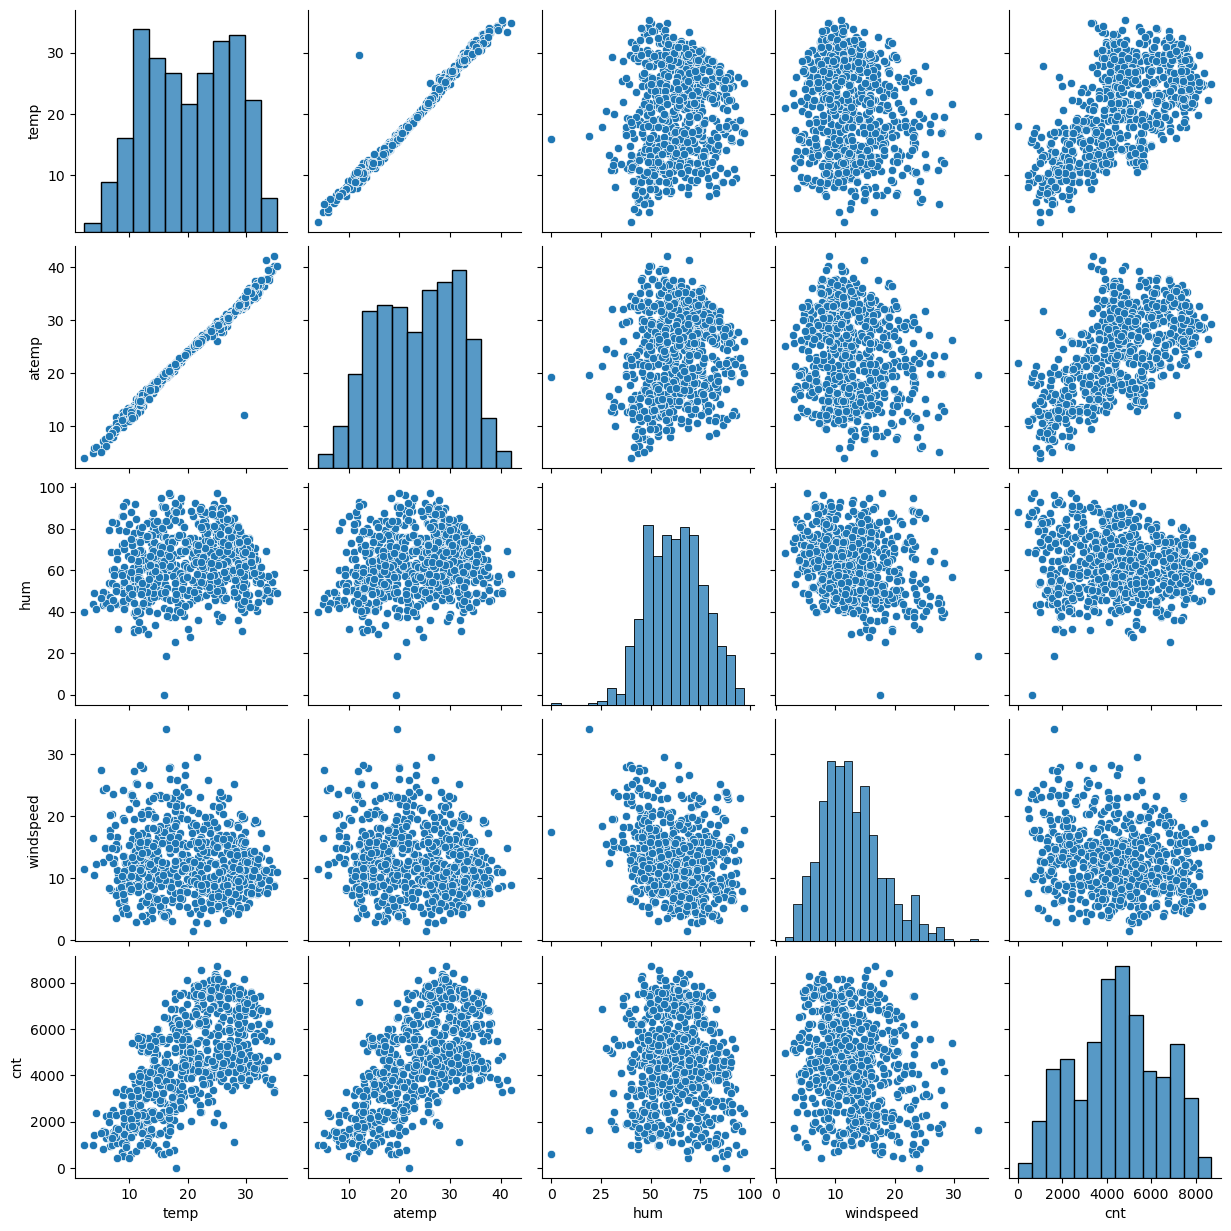

In [70]:
#Visualising the numeric variables
numerical_cols = ["temp","atemp","hum","windspeed","cnt"]
sns.pairplot(bike[numerical_cols])
plt.show()

In [71]:
bike[numerical_cols].corr()

temp     atemp       hum  windspeed       cnt
temp       1.000000  0.991696  0.128565  -0.158186  0.627044
atemp      0.991696  1.000000  0.141512  -0.183876  0.630685
hum        0.128565  0.141512  1.000000  -0.248506 -0.098543
windspeed -0.158186 -0.183876 -0.248506   1.000000 -0.235132
cnt        0.627044  0.630685 -0.098543  -0.235132  1.000000

### Inference from Pairplot
- Looks like there is a Linear relationship between temperature and count of rental bikes
- Similarly ther is a linear relationship between atemp(Feeling Temperature) and count of rental bikes. Also Temp and atemp are intercorelated
- Count of rental bikes when humidity is low is very low
- Count of rental bikes when windspeed is high is also low

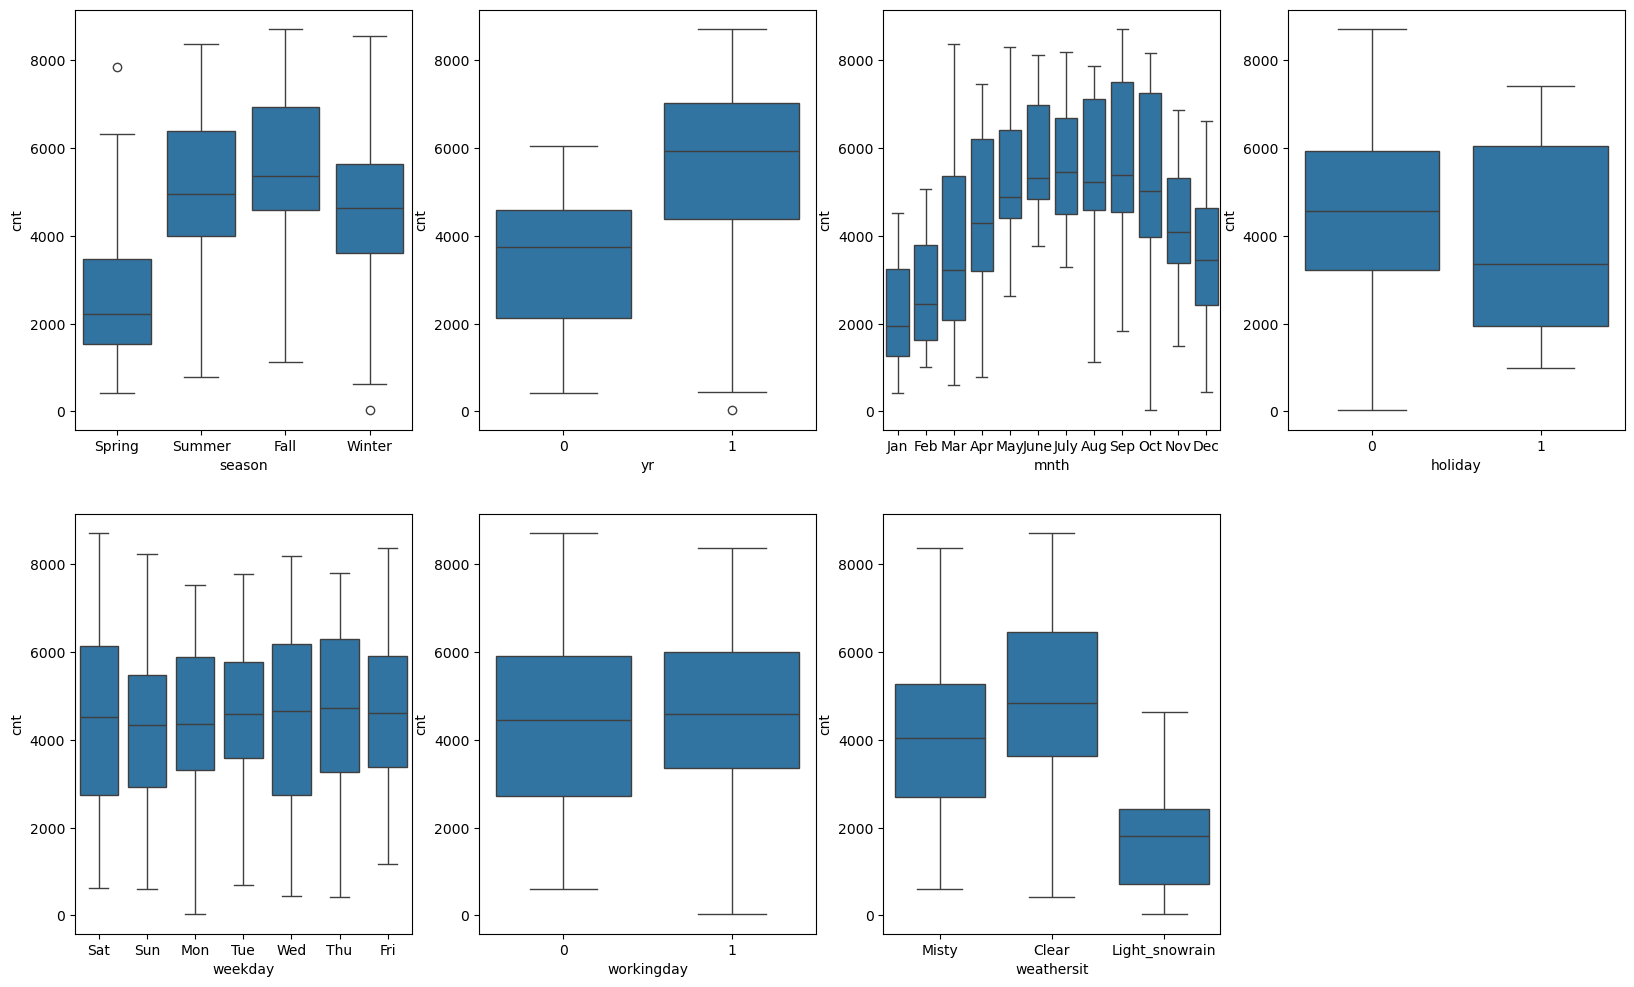

In [73]:
#Visualise categorical variables
plt.figure(figsize=(20,12))
plt.subplot(2,4,1)
sns.boxplot(x="season", y="cnt", data=bike)
plt.subplot(2,4,2)
sns.boxplot(x="yr", y="cnt", data=bike)
plt.subplot(2,4,3)
sns.boxplot(x="mnth", y="cnt", data=bike)
plt.subplot(2,4,4)
sns.boxplot(x="holiday", y="cnt", data=bike)
plt.subplot(2,4,5)
sns.boxplot(x="weekday", y="cnt", data=bike)
plt.subplot(2,4,6)
sns.boxplot(x="workingday", y="cnt", data=bike)
plt.subplot(2,4,7)
sns.boxplot(x="weathersit", y="cnt", data=bike)
plt.show()

### Inferences from boxplots for categorical variables
- Count of Rental bikes is high during Fall and very low during spring
- Count of Rental bikes have increased in 2019
- Months between May to October generally have high counts with lowest being in January and around January
- When it is a holiday counts of rentals are generally less
- Weekday and workingday have generally less impact on the count of rentals
- Count of Rentals during Light_snowrain will be very less and high during Clear weather and average during Misty

## Step 4 : Preparing the data for Linear Regression
- Encoding
    - Converting binary variables to 1/0 - Which is the case already
    - Other categorical variables to dummy variables
- Splitting into train and test
- Rescaling of variables

In [76]:
bike.head()

season  yr mnth  holiday weekday  workingday weathersit       temp  \
0  Spring   0  Jan        0     Sat           0      Misty  14.110847   
1  Spring   0  Jan        0     Sun           0      Misty  14.902598   
2  Spring   0  Jan        0     Mon           1      Clear   8.050924   
3  Spring   0  Jan        0     Tue           1      Clear   8.200000   
4  Spring   0  Jan        0     Wed           1      Clear   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [77]:
# Dummy variable creation for month, weekday, weathersit and season variables.

seasons_bike_df=pd.get_dummies(bike.season,drop_first=True, dtype="int")
months_bike_df=pd.get_dummies(bike.mnth,drop_first=True, dtype="int")
weekdays_bike_df=pd.get_dummies(bike.weekday,drop_first=True, dtype="int")
weathersit_bike_df=pd.get_dummies(bike.weathersit,drop_first=True, dtype="int")


In [78]:
# Merging  the dataframe, with the dummy variable dataset. 

bike_updated = pd.concat([bike,seasons_bike_df,months_bike_df,weekdays_bike_df,weathersit_bike_df],axis=1)

In [79]:
bike_updated.head()

season  yr mnth  holiday weekday  workingday weathersit       temp  \
0  Spring   0  Jan        0     Sat           0      Misty  14.110847   
1  Spring   0  Jan        0     Sun           0      Misty  14.902598   
2  Spring   0  Jan        0     Mon           1      Clear   8.050924   
3  Spring   0  Jan        0     Tue           1      Clear   8.200000   
4  Spring   0  Jan        0     Wed           1      Clear   9.305237   

      atemp      hum  ...  Oct  Sep  Mon  Sat  Sun  Thu  Tue  Wed  \
0  18.18125  80.5833  ...    0    0    0    1    0    0    0    0   
1  17.68695  69.6087  ...    0    0    0    0    1    0    0    0   
2   9.47025  43.7273  ...    0    0    1    0    0    0    0    0   
3  10.60610  59.0435  ...    0    0    0    0    0    0    1    0   
4  11.46350  43.6957  ...    0    0    0    0    0    0    0    1   

   Light_snowrain  Misty  
0               0      1  
1               0      1  
2               0      0  
3               0      0  
4               0      0  

[5 rows x 34 columns]

In [80]:
# Let us drop these columns as we have created dummy varaibel out of it
bike_updated.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [81]:
bike_updated.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0   0        0           0  14.110847  18.18125  80.5833  10.749882   985   
1   0        0           0  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   Spring  Summer  ...  Oct  Sep  Mon  Sat  Sun  Thu  Tue  Wed  \
0       1       0  ...    0    0    0    1    0    0    0    0   
1       1       0  ...    0    0    0    0    1    0    0    0   
2       1       0  ...    0    0    1    0    0    0    0    0   
3       1       0  ...    0    0    0    0    0    0    1    0   
4       1       0  ...    0    0    0    0    0    0    0    1   

   Light_snowrain  Misty  
0               0      1  
1               0      1  
2               0      0  
3               0      0  
4               0      0  

[5 rows x 30 columns]

In [82]:
bike_final = bike_updated

### Splitting into train and test

In [84]:
df_train, df_test = train_test_split(bike_final, train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


### Rescaling of variables

In [86]:
#Let us use Min-Max Scaler
scaler = MinMaxScaler()
#numerical_cols = ["temp","atemp","hum","windspeed","cnt"] - Which is already declared

# 2. Fit on data
df_train[numerical_cols] = scaler.fit_transform(df_train[numerical_cols])
df_train.head()


yr  holiday  workingday      temp     atemp       hum  windspeed  \
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           0  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   
111   0        0           1  0.345824  0.318819  0.751824   0.380981   

          cnt  Spring  Summer  ...  Oct  Sep  Mon  Sat  Sun  Thu  Tue  Wed  \
576  0.827658       0       0  ...    0    0    0    0    0    0    1    0   
426  0.465255       1       0  ...    0    0    0    1    0    0    0    0   
728  0.204096       1       0  ...    0    0    0    0    1    0    0    0   
482  0.482973       0       1  ...    0    0    0    1    0    0    0    0   
111  0.191095       0       1  ...    0    0    0    0    0    0    0    0   

     Light_snowrain  Misty  
576               0      0  
426               0      1  
728               0      0  
482               0      1  
111               0      1  

[5 rows x 30 columns]

In [87]:
df_train.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.676471    0.537440    0.513156    0.650480   
std      0.500429    0.157763    0.468282    0.225858    0.212410    0.145846   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.332086    0.538643   
50%      1.000000    0.000000    1.000000    0.542596    0.529718    0.653714   
75%      1.000000    0.000000    1.000000    0.735215    0.688457    0.754830   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed         cnt      Spring      Summer  ...         Oct  \
count  510.000000  510.000000  510.000000  510.000000  ...  510.000000   
mean     0.320883    0.513499    0.243137    0.247059  ...    0.084314   
std      0.169803    0.224421    0.429398    0.431725  ...    0.278131   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.199179    0.356420    0.000000    0.000000  ...    0.000000   
50%      0.296763    0.518638    0.000000    0.000000  ...    0.000000   
75%      0.414447    0.684710    0.000000    0.000000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

              Sep         Mon         Sat         Sun         Thu         Tue  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.080392    0.150980    0.154902    0.143137    0.133333    0.131373   
std      0.272166    0.358381    0.362166    0.350557    0.340268    0.338139   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              Wed  Light_snowrain       Misty  
count  510.000000      510.000000  510.000000  
mean     0.158824        0.029412    0.345098  
std      0.365870        0.169124    0.475867  
min      0.000000        0.000000    0.000000  
25%      0.000000        0.000000    0.000000  
50%      0.000000        0.000000    0.000000  
75%      0.000000        0.000000    1.000000  
max      1.000000        1.000000    1.000000  

[8 rows x 30 columns]

## Step 5 : Training the Model

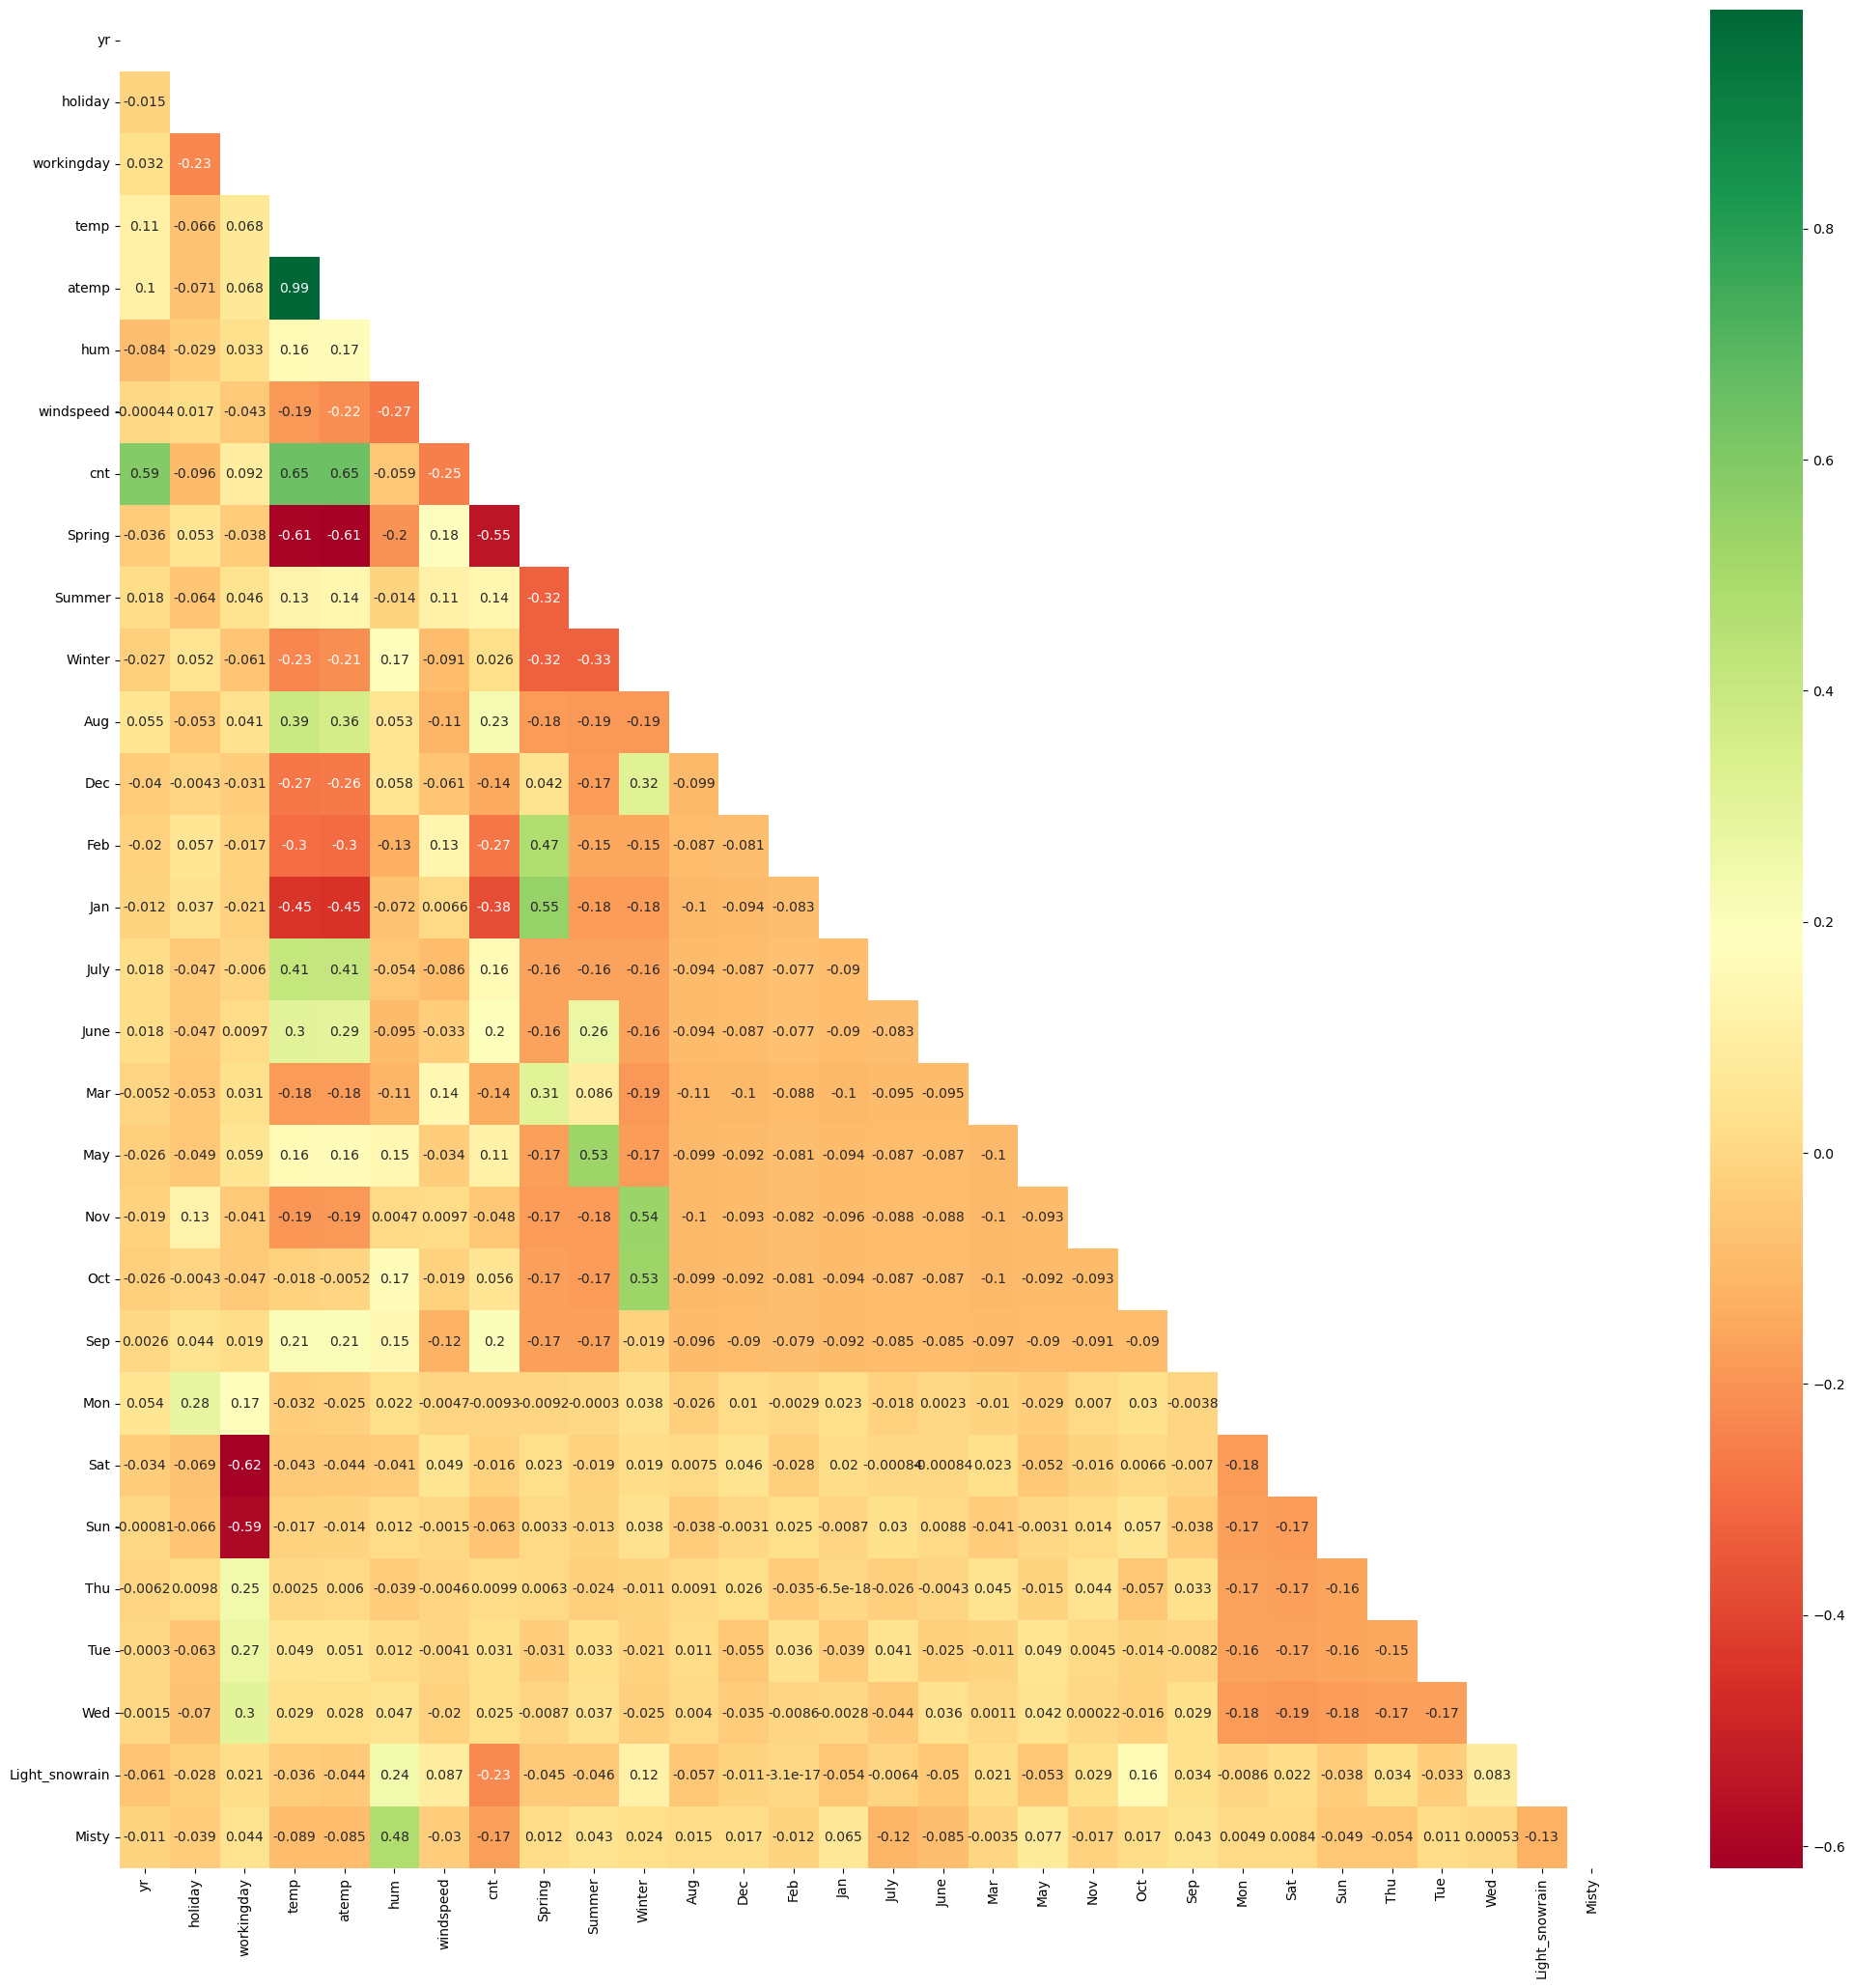

In [89]:
#heatmap to see which varaibles are corelated
plt.figure(figsize = (25,25))
sns.heatmap(df_train.corr(), annot=True, cmap = "RdYlGn", mask=np.triu(df_train.corr()))
plt.show()

In [90]:
# Let us build the Linear Model
y_train = df_train.pop("cnt")
X_train = df_train

#### Let us use RFE technique to build model

In [92]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [93]:
#Let us first select around 50% of the features
rfe = RFE(lr,n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [94]:
#List of variables selected in top 15 list
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 14),
 ('Mar', False, 15),
 ('May', False, 6),
 ('Nov', False, 2),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('Mon', False, 9),
 ('Sat', True, 1),
 ('Sun', False, 8),
 ('Thu', False, 11),
 ('Tue', False, 10),
 ('Wed', False, 12),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1)]

In [95]:
# selecting the selected variable via RFE in col list
col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Summer', 'Winter', 'Jan', 'July', 'Sep', 'Sat', 'Light_snowrain',
       'Misty'],
      dtype='object')


In [96]:
# checking which columns has been rejected
X_train.columns[~rfe.support_]

Index(['atemp', 'Aug', 'Dec', 'Feb', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Mon',
       'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

In [97]:
#Function to build a model using statsmodel api
def build_lr_model(columns):
    X_train_sm = sm.add_constant(X_train[columns])
    lr = sm.OLS(y_train, X_train_sm).fit()
    print(lr.summary())
    return lr

In [98]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def display_vif(columns):
    fun_df = X_train[columns]
    vif = pd.DataFrame()
    vif['Features'] = fun_df.columns
    vif['VIF'] = [variance_inflation_factor(fun_df.values, i) for i in range(fun_df.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [99]:
display_vif(col)

          Features    VIF
4              hum  29.37
3             temp  17.78
2       workingday   5.31
5        windspeed   4.73
6           Spring   4.53
8           Winter   3.46
7           Summer   2.85
14           Misty   2.29
0               yr   2.09
12             Sat   1.98
9              Jan   1.67
10            July   1.59
11             Sep   1.39
13  Light_snowrain   1.24
1          holiday   1.18


### Let us do some business analysis or EDA for selecting columns

In [101]:
bike_final.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'Spring', 'Summer', 'Winter', 'Aug', 'Dec', 'Feb', 'Jan', 'July',
       'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thu',
       'Tue', 'Wed', 'Light_snowrain', 'Misty'],
      dtype='object')

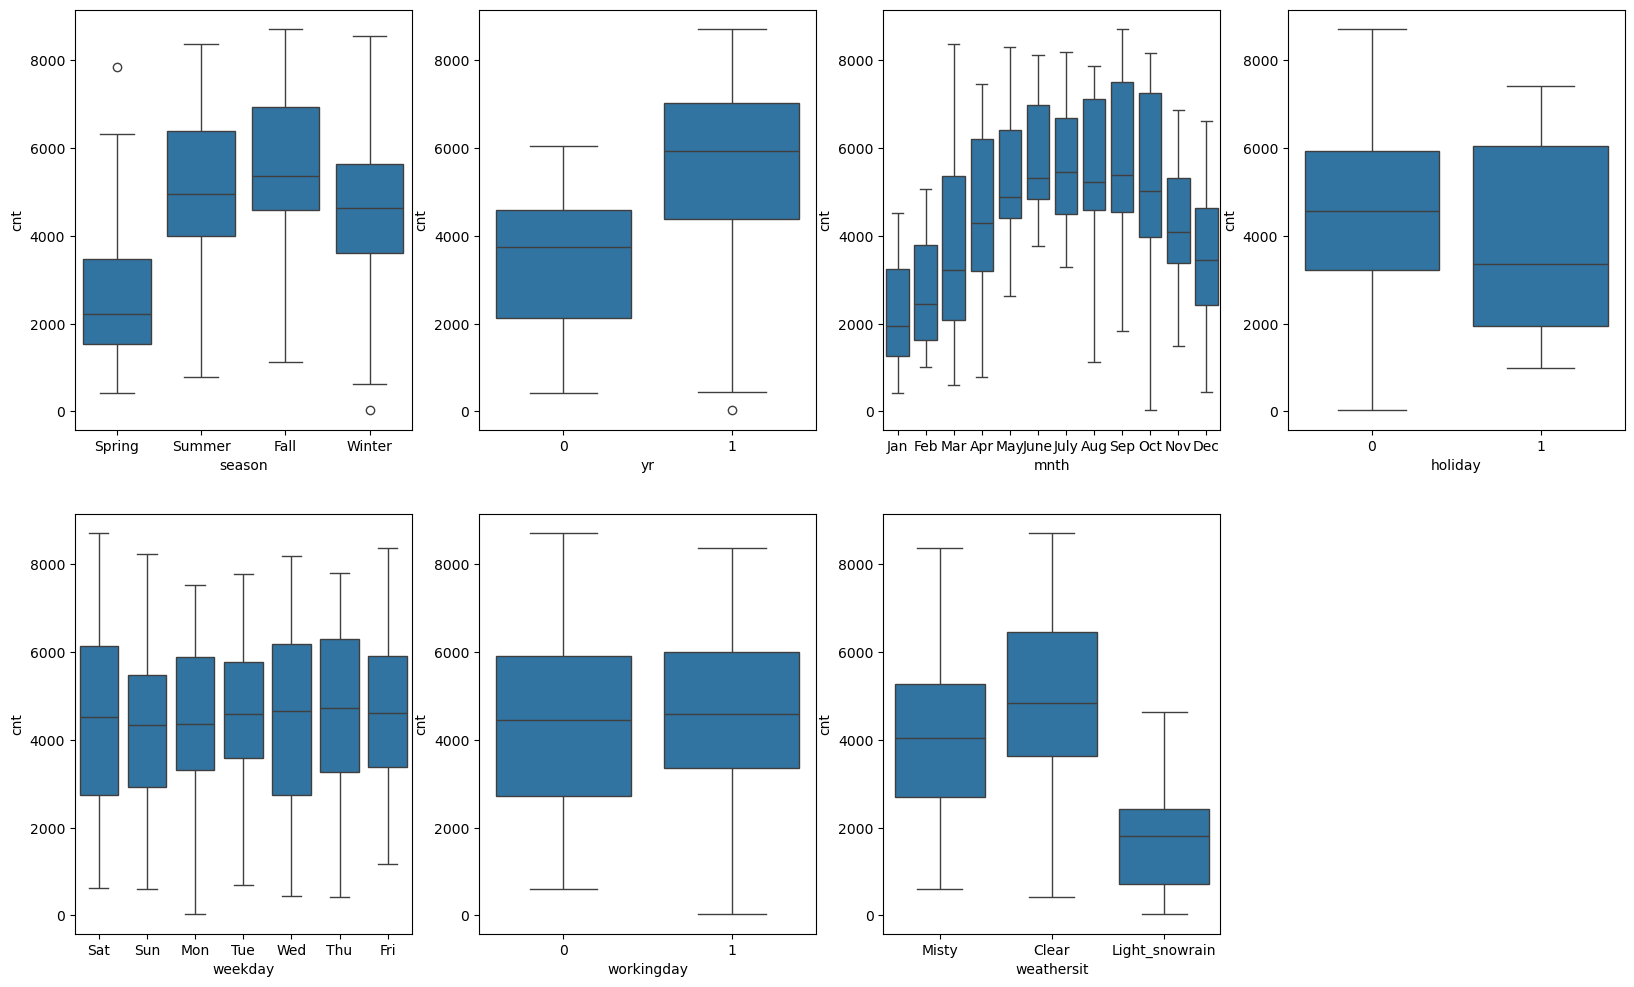

In [102]:
#Let us revist the categorical variables
#Visualise categorical variables
plt.figure(figsize=(20,12))
plt.subplot(2,4,1)
sns.boxplot(x="season", y="cnt", data=bike)
plt.subplot(2,4,2)
sns.boxplot(x="yr", y="cnt", data=bike)
plt.subplot(2,4,3)
sns.boxplot(x="mnth", y="cnt", data=bike)
plt.subplot(2,4,4)
sns.boxplot(x="holiday", y="cnt", data=bike)
plt.subplot(2,4,5)
sns.boxplot(x="weekday", y="cnt", data=bike)
plt.subplot(2,4,6)
sns.boxplot(x="workingday", y="cnt", data=bike)
plt.subplot(2,4,7)
sns.boxplot(x="weathersit", y="cnt", data=bike)
plt.show()

#### Inferences
- Looks like there is a strong corelation between season, months and weather. Our general knowledge also says the same
- Working day does not have much significance on the count
- Weekday does not have much significance on the cnt

<Axes: xlabel='weathersit', ylabel='mnth'>

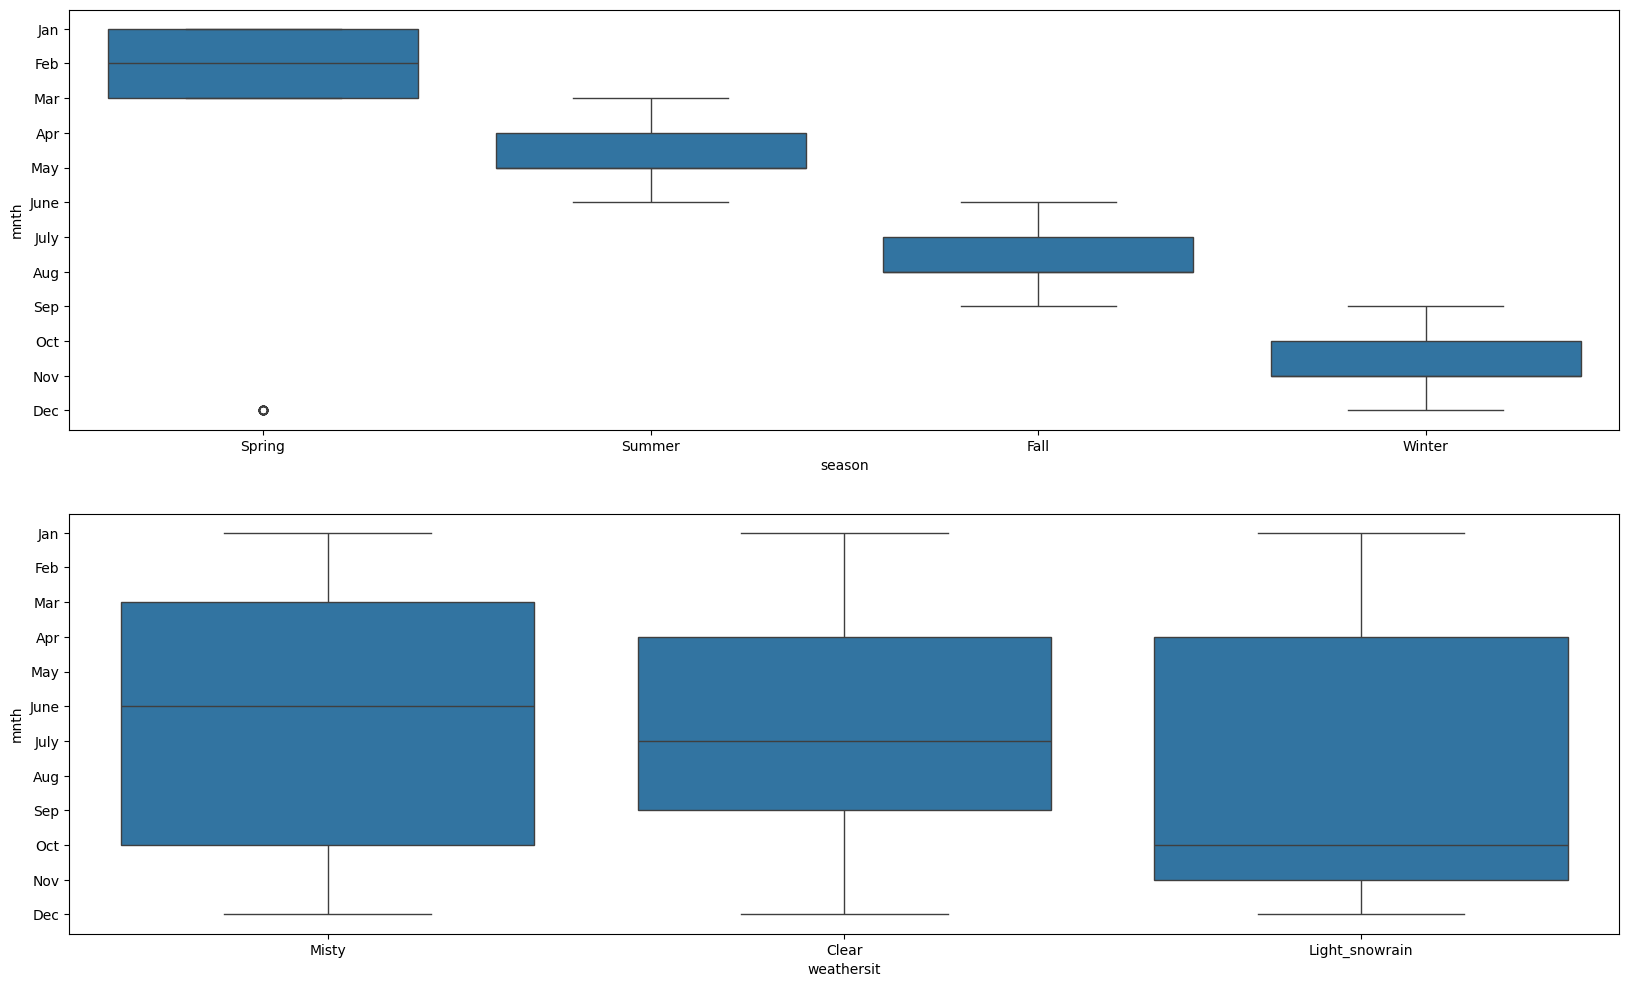

In [104]:
plt.figure(figsize=(20,12))
plt.subplot(2,1,1)
sns.boxplot(x="season", y="mnth", data=bike)
plt.subplot(2,1,2)
sns.boxplot(x="weathersit", y="mnth", data=bike)

#### Inferences
- Month and Season are completely corelated
    - Spring corresponds to Jan, Feb, Mar
    - Summer corresponds to Apr and May and some part of Jun
    - Fall corresponds to some part of Jun, Jul, Aug and some parts of Sep
    - Winter corresponds to some part of Sep, oct, nov and dec
- Not very much corelations between weather sit and months

#### While building models, how we have to choose which columns to drop?
- High p-value, high VIF
- High-low:
    -  High p, low VIF : remove these first
    -  Low p, high VIF : remove these after the ones above
-  Low p, low VIF

#### Model Building
- Let us select all columns and see the result
- Remove the columns based on our domain and check the numbers

#### Model - 1

In [109]:
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Summer', 'Winter', 'Jan', 'July', 'Sep', 'Sat', 'Light_snowrain',
       'Misty'],
      dtype='object')

In [110]:
# Let us start with RFE method above are the columns given by RFE
columns = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Summer', 'Winter', 'Jan', 'July', 'Sep', 'Sat', 'Light_snowrain',
       'Misty']
lr1 = build_lr_model(columns)
display_vif(columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          4.22e-191
Time:                        23:14:37   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2519      0.036      6.

In [111]:
# All p values are <0.05  and humidity is having VIF > 5

#### Model 2 
Let us remove humidity and rerun our model


In [113]:
columns = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'Spring',
       'Summer', 'Winter', 'Jan', 'July', 'Sep', 'Sat', 'Light_snowrain',
       'Misty']
lr2 = build_lr_model(columns)
display_vif(columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          1.60e-188
Time:                        23:14:37   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1737      0.031      5.

In [114]:
# Temperature and Months might be corelated, let us now drop workingday as it has VIF of greater than 5 and see the model

#### Model -3 

In [116]:
columns = ['yr', 'holiday', 'temp', 'windspeed', 'Spring',
       'Summer', 'Winter', 'Jan', 'July', 'Sep', 'Sat', 'Light_snowrain',
       'Misty']
lr3 = build_lr_model(columns)
display_vif(columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.1
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          2.48e-186
Time:                        23:14:37   Log-Likelihood:                 502.77
No. Observations:                 510   AIC:                            -977.5
Df Residuals:                     496   BIC:                            -918.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2120      0.030      6.

In [117]:
#Let us drop Saturday as it has p value >0.05 and also we have seen from graphical analysis that week of the day has minimal impact on the outcome

#### Model - 4 

In [119]:
#Removing Saturday from the columns
columns = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'Spring',
       'Summer', 'Winter', 'Jan', 'July', 'Sep', 'Light_snowrain',
       'Misty']
lr4 = build_lr_model(columns)
display_vif(columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.1
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          2.50e-186
Time:                        23:14:37   Log-Likelihood:                 502.76
No. Observations:                 510   AIC:                            -977.5
Df Residuals:                     496   BIC:                            -918.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2044      0.031      6.

#### Model - 5 :
- We can see that working day has less significance from our graphs earlier and also VIF value is high. Let us remove it

In [121]:
columns = ['yr', 'holiday', 'temp', 'windspeed', 'Spring',
       'Summer', 'Winter', 'Jan', 'July', 'Sep', 'Light_snowrain',
       'Misty']
lr5 = build_lr_model(columns)
display_vif(columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          8.14e-187
Time:                        23:14:37   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2154      0.030      7.

#### Model 6 
- Let us remove Windspeed as we see from our graphical analysis that it is not having direct impact and also has high VIF

In [123]:
columns = ['yr', 'holiday', 'temp', 'Spring',
       'Summer', 'Winter', 'Jan', 'July', 'Sep', 'Light_snowrain',
       'Misty']
lr6 = build_lr_model(columns)
X_train_sm = sm.add_constant(X_train[columns])
display_vif(columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     212.6
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          3.83e-180
Time:                        23:14:37   Log-Likelihood:                 482.52
No. Observations:                 510   AIC:                            -941.0
Df Residuals:                     498   BIC:                            -890.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1586      0.030      5.

In [124]:
#Let us remove January and also look at July, September in subsequent steps as months might be covered by seasons / temp

#### Model 7
- Removing Jan as it has high p value

In [126]:
columns = ['yr', 'holiday', 'temp', 'Spring',
       'Summer', 'Winter','July','Sep', 'Light_snowrain',
       'Misty']
lr7 = build_lr_model(columns)
X_train_sm = sm.add_constant(X_train[columns])
display_vif(columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.3
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          5.71e-181
Time:                        23:14:37   Log-Likelihood:                 481.64
No. Observations:                 510   AIC:                            -941.3
Df Residuals:                     499   BIC:                            -894.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1501      0.029      5.

In [127]:
# This model is pretty decent, how ever let us use our domain understanding and see how the system behaves,
# When we remove July and September one after the other

#### Model 8 
- Let us remove July and see if there is significant different as July has got minor negetive coefficient

In [129]:
columns = ['yr', 'holiday', 'temp', 'Spring',
       'Summer', 'Winter','Sep', 'Light_snowrain',
       'Misty']
lr8 = build_lr_model(columns)
X_train_sm = sm.add_constant(X_train[columns])
display_vif(columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     255.2
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          1.33e-180
Time:                        23:14:37   Log-Likelihood:                 477.90
No. Observations:                 510   AIC:                            -935.8
Df Residuals:                     500   BIC:                            -893.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1414      0.029      4.

#### Model 9:
- Let us now remove September so that we can remove dependency on Month and see the model, September has very small coef

In [131]:
columns = ['yr', 'holiday', 'temp', 'Spring',
       'Summer', 'Winter','Light_snowrain',
       'Misty']
lr9 = build_lr_model(columns)
X_train_sm = sm.add_constant(X_train[columns])
display_vif(columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     266.6
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          4.09e-175
Time:                        23:14:37   Log-Likelihood:                 462.08
No. Observations:                 510   AIC:                            -906.2
Df Residuals:                     501   BIC:                            -868.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1721      0.030      5.

In [132]:
# Summer has p value > 0.05, let us remove Summer as well

#### Model 10
 - Let us remove Summer column as it has p value of 0.063

In [134]:
columns = ['yr', 'holiday', 'temp', 'Spring',
       'Winter','Light_snowrain',
       'Misty']
lr10 = build_lr_model(columns)
X_train_sm = sm.add_constant(X_train[columns])
display_vif(columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     302.7
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          1.28e-175
Time:                        23:14:38   Log-Likelihood:                 460.32
No. Observations:                 510   AIC:                            -904.6
Df Residuals:                     502   BIC:                            -870.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2082      0.023      9.

#### This Model 10 looks like a pretty decent model. With R2 value of 0.808 and Adjusted R2 value of 0.806
- No p values above 0.05
- No VIF above 5
- If we remove any other parameter, we are seeing a relatively big drop in R2, adjusted R2 both in Train and Test Dataset. 

### INFERENCE
- We have come down to just 7 important Parameters now
- Most Important Parameters are Temperature, Year, Winter which impacts in a positive way and Light_snowrain, Sprint, Misty and holiday impacts in a negative way. 

### Step 6 : Residual Analysis

In [138]:
y_train_pred = lr10.predict(X_train_sm)

In [139]:
#Plot a histogram of the error terms
def plot_histogram(act, pred):
    sns.displot(act-pred, kde= True)
    plt.title('Error Terms')
    plt.xlabel('Errors')

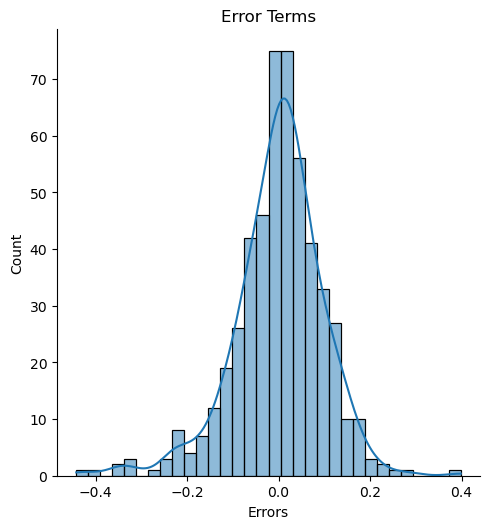

In [140]:
plot_histogram(y_train, y_train_pred)

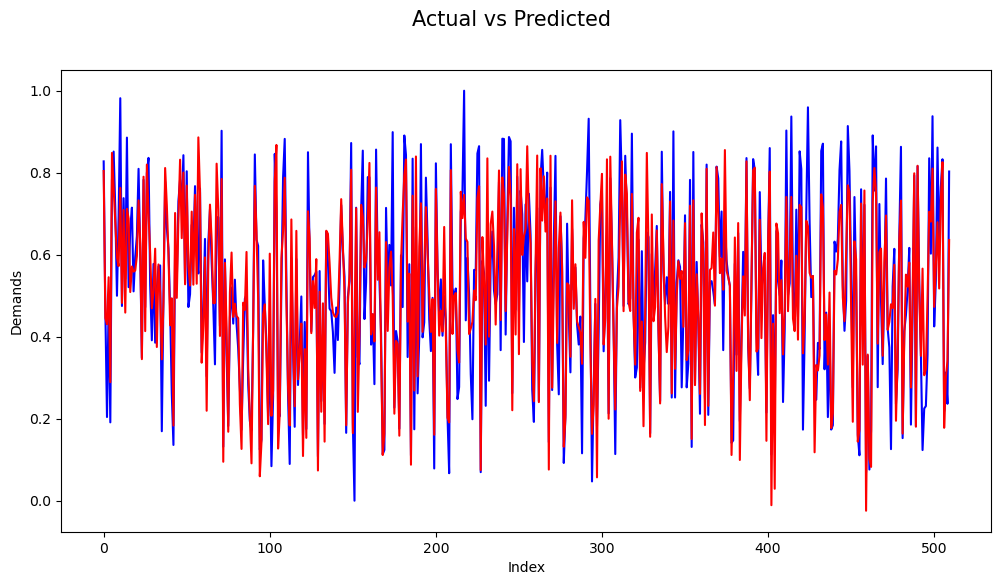

In [141]:
# Actual vs Predicted

plt.figure(figsize=(12, 6))
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

### Let us validate the assumptions of Linear Regression model
1. <b>Linearity</b> - To Check if the relationship between the predictors and the target variable is linear. Residuals vs Predicted values, there should be no clear pattern
2. <b>Homoscedasticity</b> - To check whether residuals have constant variance, residuals vs predicted values. The spread of residuals should be constant across all the levels of predicted values
3. <b>Normality of Residuals </b> - To Check whether the residuals are normally distributed using a histogram plot
4. <b>Independence </b> - To check if residuals are independent, use Durbin-Watson test
5. <b>Multicolinearity </b> - To check the predictor variables are not highly correlated with each other using VIF

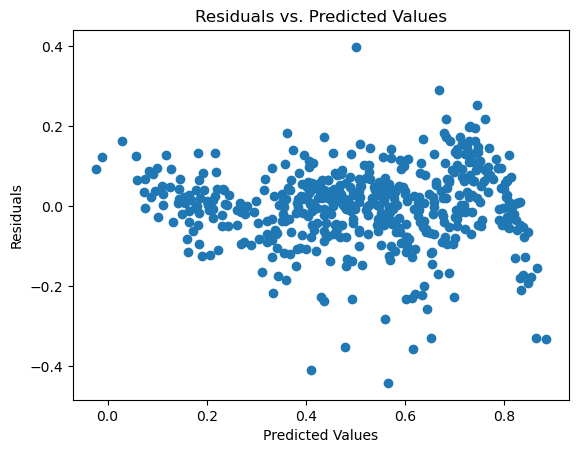

In [143]:
#Linearity
residuals = y_train - y_train_pred
plt.scatter(y_train_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()


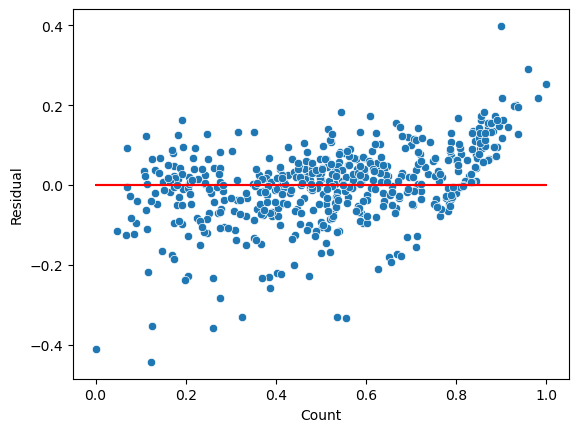

In [144]:
# Homoscedasticity 
residual = y_train - y_train_pred
sns.scatterplot(x = y_train,y = residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

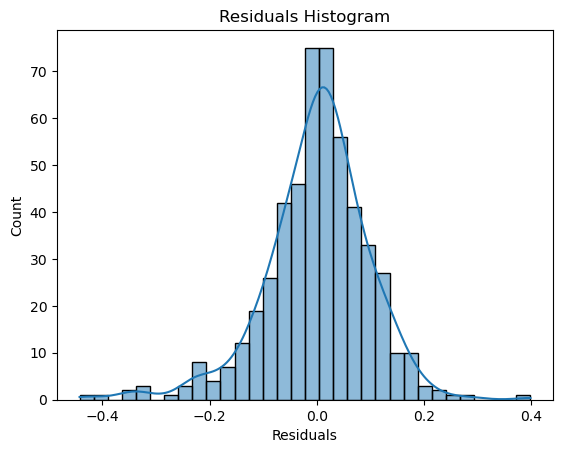

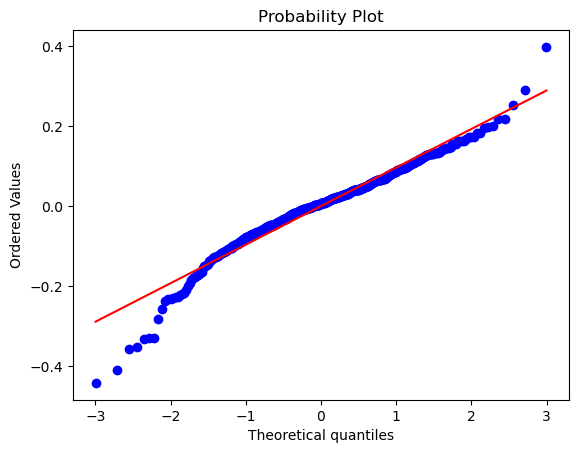

In [145]:
#Normality of residuals

# Histogram
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Residuals Histogram')
plt.show()

# Q-Q Plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.show()


In [146]:
#Independence
from statsmodels.stats.stattools import durbin_watson

durbin_watson_stat = durbin_watson(residuals)
print(f'Durbin-Watson Statistic: {durbin_watson_stat}')


Durbin-Watson Statistic: 2.0208862713830444


In [147]:
#Multicollinearity
display_vif(columns)


         Features   VIF
2            temp  2.25
0              yr  2.04
6           Misty  1.48
4          Winter  1.29
3          Spring  1.22
5  Light_snowrain  1.06
1         holiday  1.04


In [148]:
r2_score(y_train, y_train_pred)

0.8084527291860223

### Step 7 : Predictions and Evaluation on the Test data set

In [150]:
#Test Dataset, let us lookinto the test dataset once
df_test.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
184   0        1           0  29.793347  33.27085  63.7917   5.459106  6043   
535   1        0           1  32.082500  36.04875  59.2083   7.625404  6211   
299   0        0           1  19.270000  22.85230  81.2917  13.250121  2659   
221   0        0           1  31.433347  34.24915  42.4167  13.417286  4780   
152   0        0           1  29.315000  32.19710  30.5000  19.583229  4968   

     Spring  Summer  ...  Oct  Sep  Mon  Sat  Sun  Thu  Tue  Wed  \
184       0       0  ...    0    0    1    0    0    0    0    0   
535       0       1  ...    0    0    0    0    0    0    0    1   
299       0       0  ...    1    0    0    0    0    1    0    0   
221       0       0  ...    0    0    0    0    0    0    0    1   
152       0       1  ...    0    0    0    0    0    1    0    0   

     Light_snowrain  Misty  
184               0      1  
535               0      0  
299               0      1  
221               0      0  
152               0      0  

[5 rows x 30 columns]

In [151]:
#Let us look at all numerical cols we have defined earlier for trian dataset
numerical_cols

['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [152]:
#Apply the same mim-Max scaler applied on the train dataset
df_test[numerical_cols] = scaler.transform(df_test[numerical_cols])

In [153]:
y_test = df_test.pop("cnt")
X_test = df_test

In [154]:
#add constant
X_test_sm = sm.add_constant(X_test[columns])
X_test_sm.head()

const  yr  holiday      temp  Spring  Winter  Light_snowrain  Misty
184    1.0   0        1  0.831783       0       0               0      1
535    1.0   1        0  0.901354       0       0               0      0
299    1.0   0        0  0.511964       0       1               0      1
221    1.0   0        0  0.881625       0       0               0      0
152    1.0   0        0  0.817246       0       0               0      0

In [155]:
# Calculate Predicted value for test dataset
y_test_pred = lr10.predict(X_test_sm)

In [156]:
# Calculate R Squared for test dataset
r2 = r2_score(y_test, y_test_pred)
print(r2)

0.8069240059322538


In [157]:
# Calculate Adjusted-R2 for test dataset
adj_r2 = round(1-(1-r2)*(X_test_sm.shape[0]-1)/(X_test_sm.shape[0]-X_test_sm.shape[1]-1),4)
print(adj_r2)

0.7996


### Final Result

- Number of Final Parameters 7
- Parameters : temp, yr, winter, Light_Snowrain,Sprint,holiday, Misty 
- Train R^2 :0.808 - Train Adjusted R^2 :0.806 <br/>
- Test R^2 :0.806 - Test Adjusted R^2 :0.7996 <br/>

Thus we can conclude that model is failry good and generalize various datasets and can be written as shown below
- Train R^2 and Test R^2 are almost same, similart Train Adjusted R^2 and Test Adjusted R^2 are also very close to each other
- So trained model is working with similar accuracy in test model as well
- We have reduced the number of Parameters to 7 by using RFE, p Value, VIF and our Business knowledge

cnt = 0.2082 + (temp * 0.4442) + (yr * 0.2338) + (winter * 0.0534) - (Light_snowrain * 0.2949) - (Spring * 0.1204) - (Holiday * 0.0906) - (Misty * 0.0727)

- Year, Temperature, Summer, Winter, September have positive effect on the count of rental bikes
    - Temperature - 0.4442
    - Year - 0.2338    
    - Winter - 0.0534 
- Holiday, Windspeed, Spring, Light_snowrain and Misty have negative effect on the count of rental bikes
    - Light_snowrain - -0.2949 
    - Spring - -0.1204
    - Holiday - -0.0906
    - Misty - -0.0727